# Part Two: The network of American politics
This exercise assumes that you have already downloaded wiki-pages and created the directed network of members of congress from Wikipedia (see Week 4's exercises).

## 4. Basic stats for pages over time
Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).

- By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Load data
H113 = pd.read_csv("../socialgraphs2018/files/data_US_congress/H113.csv")
H113["congressnumber"] = 113
H114 =pd.read_csv("../socialgraphs2018/files/data_US_congress/H114.csv")
H114["congressnumber"] = 114
H115 = pd.read_csv("../socialgraphs2018/files/data_US_congress/H115.csv")
H115["congressnumber"] = 115

In [38]:
#Preprocessing data
allmembers = pd.concat([H113,H114,H115]).reset_index(drop=True)
elected=allmembers.groupby("congressnumber")
electedsize=elected.size()
print electedsize

congressnumber
113    444
114    442
115    445
dtype: int64


We clearly see that the number of representatives is higher than 435! This is due to replacements during the period. A line plot can be seen below

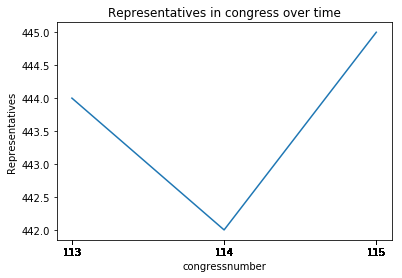

In [78]:
#Plotting
plt.title("Representatives in congress over time")
plt.ylabel("Representatives")
electedsize.plot(xticks=allmembers["congressnumber"])
plt.show()

- How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

1    131
2    114
3    324
dtype: int64


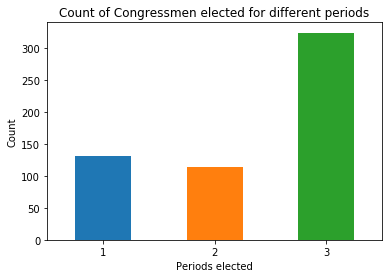

In [73]:
#Group by name and group by self
groups = allmembers.groupby("WikiPageName")
time_in_groups = groups.size().sort_values()
result = time_in_groups.groupby(time_in_groups).size()
print result
#Plotting
plt.tight_layout()
plt.title("Count of Congressmen elected for different periods")
plt.ylabel("Count")
plt.xlabel("Periods elected")
result.plot.bar(rot=0)
plt.show()

We see that the majority of representatives are elected for multiple terms! 

- Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.

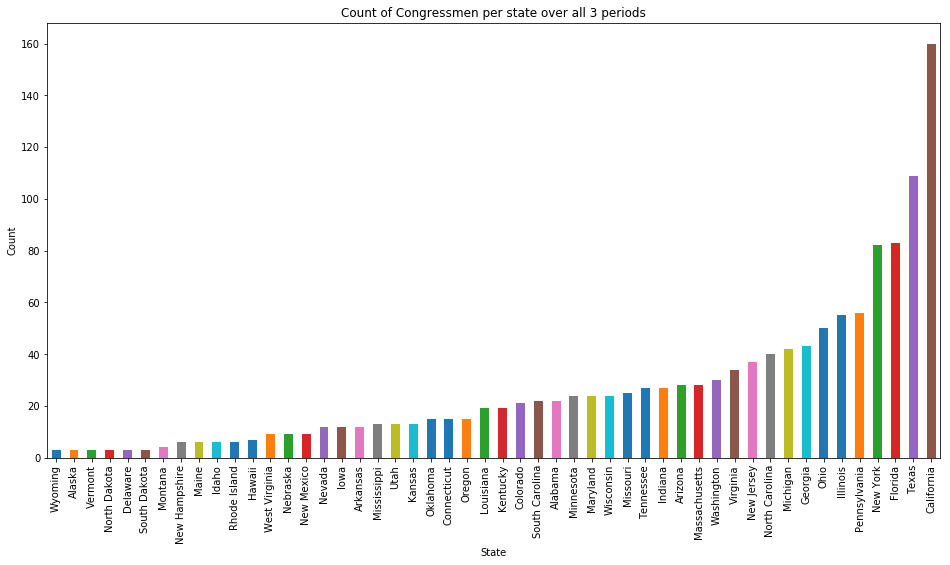

In [77]:
#Group by state
state = allmembers.groupby("State")
statesize=state.size().sort_values()
#Plotting
fig = plt.figure(figsize=(16, 8))
plt.title("Count of Congressmen per state over all 3 periods")
plt.ylabel("Count")
plt.xlabel("State")
statesize.plot("bar")
plt.show()

California and Texas are definitely the most represented states. Wyoming and Alaska are the least. This makes sense due to their population size.

- How has the party composition of the house of representative changed over time? Plot your results.

congressnumber  Party     
113             Democratic    204
                Republican    240
114             Democratic    190
                Republican    252
115             Democratic    196
                Republican    249
dtype: int64


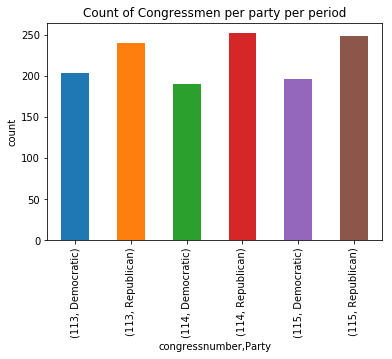

In [72]:
parties = allmembers.groupby(["congressnumber","Party"]).size()
print parties
plt.title("Count of Congressmen per party per period")
plt.ylabel("count")
parties.plot("bar",label="Democratic")
plt.show()

The house of Representatives is dominated by Republicans. The 113th Congress had the largest Democratic proportion but the following term had the largest Republican proportion (under Obama and Trumps election). 

## 5. Basic stats for the network
Create simple network statistics for the 113th house of representatives.

- What is the number of nodes in the network? And the number of links?

In [46]:
import networkx as nx
import re

In [51]:
#Making a Directed graph
G = nx.DiGraph()
#Unique list for matching
members = H113["WikiPageName"].unique()
for idx,member in enumerate(members):
    members[idx] = member.replace("_", " ")
#Adding nodes to graph
G.add_nodes_from(members)
for member in members:
    string = member.replace(" ", "_")
    with open("H113/"+string) as f:
        string = str(f.readlines())
    match = re.findall(r'\[\[(.+?)]]', string)
    #Set intersection is the fastest way to match between elements
    matchlink = list(set(match).intersection(members))
    #Adding edges to graph
    linklist = [(member,link) for link in matchlink]
    G.add_edges_from(linklist)
print "Number of edges: " + str(G.number_of_edges())
print "Number of nodes: " + str(G.number_of_nodes())

Number of edges: 1393
Number of nodes: 444


In [52]:
# Make to dict for easy life
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

- Plot the in and out-degree distributions.

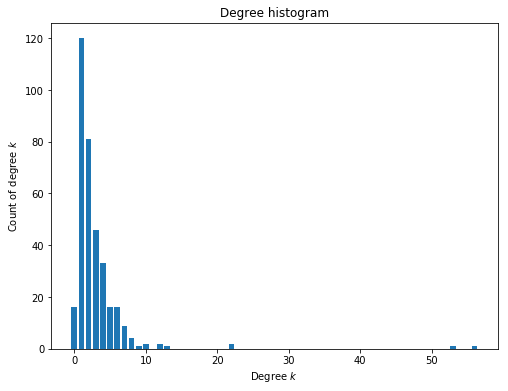

In [82]:
#Plotting the in-degree distribution
itera = list(range(min(in_degree.values()),max(in_degree.values())+1))
newitera = [x+1 for x in itera]
hist = np.histogram(in_degree.values(),bins=newitera)
fig = plt.figure(figsize=(8,6))
plt.title("Degree histogram")
plt.ylabel("Count of degree $k$")
plt.xlabel("Degree $k$")
plt.bar(list(range(min(in_degree.values()),max(in_degree.values()))),hist[0],align='center')
plt.show()

Clearly a power-log distribution!

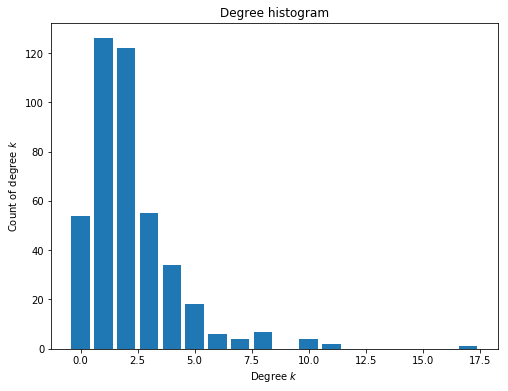

In [83]:
#Plotting the out-degree distribution
itera = list(range(min(out_degree.values()),max(out_degree.values())+1))
newitera = [x+1 for x in itera]
hist = np.histogram(out_degree.values(),bins=newitera)
fig = plt.figure(figsize=(8,6))
plt.title("Degree histogram")
plt.ylabel("Count of degree $k$")
plt.xlabel("Degree $k$")
plt.bar(list(range(min(out_degree.values()),max(out_degree.values()))),hist[0],align='center')
plt.show()

Clearly a power-log distribution!

- Who is the most connected representative?

In [64]:
#Get the most connected representative
listin = sorted(list(G.in_degree()),key=lambda x: x[1])
listout = sorted(list(G.out_degree()),key=lambda x: x[1])
listtotal = sorted(list(G.degree()),key=lambda x: x[1])
print "The representative with most links to their wikipage is %s with %d links" %listin[-1]
print "The representative with most links from their wikipage is %s with %d links" %listout[-1]
print "The representative with the highest sum of their links from and to their wikipage is %s with %d links" %listtotal[-1]

The representative with most links to their wikipage is Nancy Pelosi with 57 links
The representative with most links from their wikipage is Michele Bachmann with 18 links
The representative with the highest sum of their links from and to their wikipage is Nancy Pelosi with 66 links
